In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=fetch_california_housing()

In [10]:
input_data=pd.DataFrame(dataset["data"],columns=dataset.feature_names)
target_data=pd.DataFrame(dataset["target"],columns=dataset.target_names)

In [11]:
input_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
target_data.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
df=pd.concat([input_data,target_data],axis=1)

In [15]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [19]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [25]:
for col in df.columns:
    df[col]=df[col].apply(lambda x:-x if x<0 else x)

In [26]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,121.32,0.847


In [31]:
dependent_features=df.iloc[:,:-1]
independent_features=df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(dependent_features,independent_features,test_size=0.2,random_state=42)

In [34]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,119.80


In [35]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,121.93


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale=StandardScaler()

In [36]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [42]:
X_train.shape

(16512, 8)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10532\1724999556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[0],kde=True)


<Axes: ylabel='Density'>

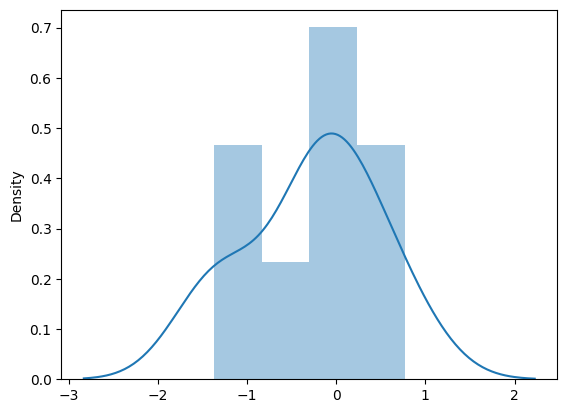

In [51]:
sns.distplot(X_train[0],kde=True)

In [54]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score

In [56]:
linear_reg_model,ridge_model,lasso_model,elastic_net_model=LinearRegression(),Ridge(),Lasso(),ElasticNet()
linear_reg_model.fit(X_train,y_train)

LinearRegression()

In [57]:
ridge_model.fit(X_train,y_train)

Ridge()

In [58]:
lasso_model.fit(X_train,y_train)

Lasso()

In [59]:
elastic_net_model.fit(X_train,y_train)

ElasticNet()

In [60]:
mse_linear_reg_model=cross_val_score(linear_reg_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
mse_ridge_model=cross_val_score(ridge_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
mse_lasso_model=cross_val_score(lasso_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
mse_elastic_net_model=cross_val_score(elastic_net_model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")

In [61]:
mse_linear_reg_model

array([-0.46912055, -0.57023278, -0.52267997, -0.48319985, -0.54304536,
       -0.49879977, -0.47454501, -0.54283267, -0.54130712, -0.55059256])

In [64]:
np.mean(mse_linear_reg_model)

-0.5196355647645039

In [66]:
linear_model_pred=linear_reg_model.predict(X_test)
ridge_model_pred=ridge_model.predict(X_test)
lasso_model_pred=lasso_model.predict(X_test)
Elastic_net_model_pred=elastic_net_model.predict(X_test)